In [1]:
import cv2
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Load paths for genuine and forged signatures
gen_sign = [glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.png'),
            glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.png'),
            glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.png'),
            glob.glob('Dataset_Signature_Final/Dataset/dataset4/real1/*.png')]

forg_sign = [glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.png'),
             glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.png'),
             glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.png'),
             glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.png')]

# Function to load images
def load_images(file_list):
    images = []
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            images.append(img)
    return images

# Load images
gen_imgs = load_images(gen_sign)
forg_imgs = load_images(forg_sign)

# Check how many genuine and forged signatures were loaded
print(f"Number of genuine signature images loaded: {sum([len(files) for files in gen_sign])}")
print(f"Number of forged signature images loaded: {sum([len(files) for files in forg_sign])}")

# Optionally, print some sample file paths to verify
if gen_sign:
    print(f"Sample genuine signature: {gen_sign[0][0]}")  # Sample file path from the first list of genuine signatures
if forg_sign:
    print(f"Sample forged signature: {forg_sign[0][0]}")  # Sample file path from the first list of forged signatures


Number of genuine signature images loaded: 360
Number of forged signature images loaded: 360
Sample genuine signature: Dataset_Signature_Final/Dataset/dataset1/real\00100001.png
Sample forged signature: Dataset_Signature_Final/Dataset/dataset1/forge\02100001.png


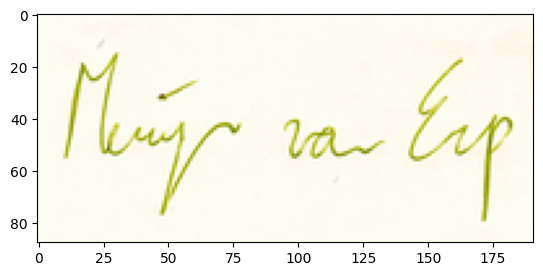

In [2]:
plt.imshow(gen_imgs[0])

In [3]:
print(gen_imgs[0])

[[[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 251 239]
  [253 251 241]
  [253 252 242]]

 [[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 252 241]
  [253 251 240]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [252 252 244]
  ...
  [253 251 240]
  [253 251 239]
  [253 251 240]]

 ...

 [[252 252 243]
  [253 252 242]
  [253 252 241]
  ...
  [253 252 242]
  [253 252 242]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [253 252 242]
  ...
  [253 252 241]
  [252 252 242]
  [252 252 243]]

 [[253 252 242]
  [252 252 242]
  [253 252 243]
  ...
  [253 251 240]
  [253 251 239]
  [253 252 241]]]


In [4]:
gen_imgs[0].shape

(88, 191, 3)

In [5]:
num_gen=sum([len(x) for x in gen_sign])
num_forg=sum([len(x) for x in forg_sign])
print(f'Number of real signatures :{ num_gen}')
print(f'Number of forged signatures :{ num_forg}')

Number of real signatures :360
Number of forged signatures :360


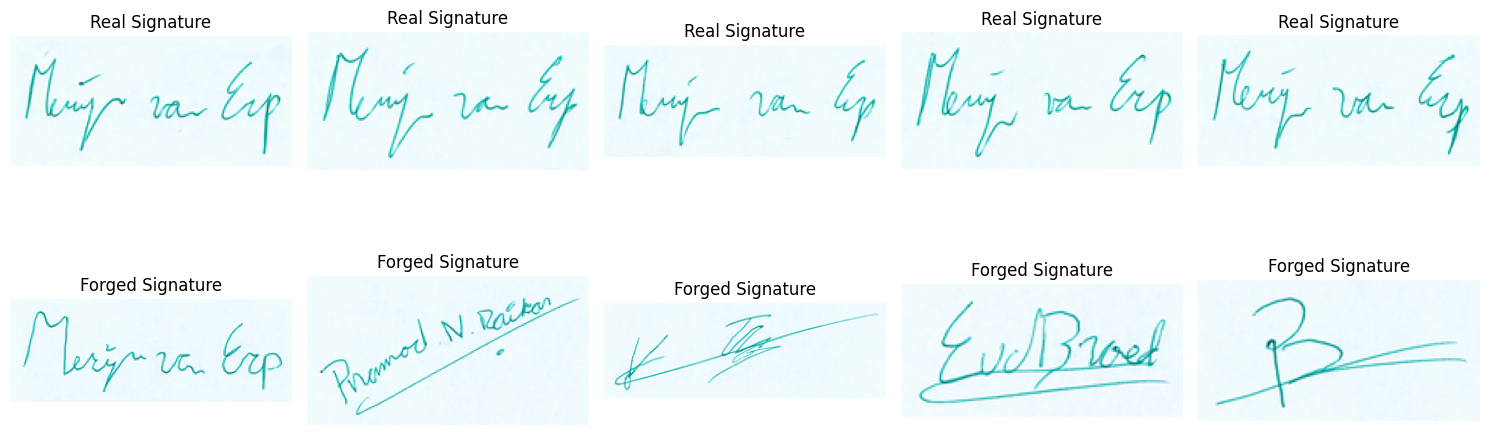

In [6]:
import matplotlib.pyplot as plt
import cv2

# Assuming gen_imgs and forg_imgs are already loaded and contain images
fig, ax = plt.subplots(2, 5, figsize=(15, 6))

# Display genuine signatures
for i in range(min(5, len(gen_imgs))):  # Use min to avoid IndexError
    ax[0, i].imshow(cv2.cvtColor(gen_imgs[i], cv2.COLOR_BGR2RGB))
    ax[0, i].set_title('Real Signature')
    ax[0, i].axis('off')  # Turn off axes

# Display forged signatures
for i in range(min(5, len(forg_imgs))):  # Use min to avoid IndexError
    ax[1, i].imshow(cv2.cvtColor(forg_imgs[i], cv2.COLOR_BGR2RGB))
    ax[1, i].set_title('Forged Signature')
    ax[1, i].axis('off')  # Turn off axes

plt.tight_layout()  # Adjust layout
plt.show()


In [7]:
image_data = pd.DataFrame(columns=['Type', 'Shape', 'Color Channels', 'Mean Pixel Value'])
                                 

In [8]:
# Initialize lists for genuine signatures
gen_shape = []
gen_color = []
gen_pixels = []

# Collect properties for genuine signatures
for img in gen_imgs:
    shape = img.shape
    gen_shape.append(shape)
    color_channels = shape[2] if len(shape) == 3 else 1
    gen_color.append(color_channels)
    mean_pixel_value = np.mean(img)
    gen_pixels.append(mean_pixel_value)

# Initialize lists for forged signatures
forg_shape = []
forg_color = []
forg_pixels = []

# Collect properties for forged signatures
for img in forg_imgs:
    shape = img.shape
    forg_shape.append(shape)
    color_channels = shape[2] if len(shape) == 3 else 1
    forg_color.append(color_channels)
    mean_pixel_value = np.mean(img)
    forg_pixels.append(mean_pixel_value)

# Initialize the DataFrame with the structure
image_data = pd.DataFrame(columns=['Type', 'Shape', 'Color Channels', 'Mean Pixel Value'])

# Collect data for real and forged signatures
data_list = []

# Append data for genuine signatures
for i in range(len(gen_shape)):
    data_list.append({'Type': 'Real',
                      'Shape': gen_shape[i],
                      'Color Channels': gen_color[i],
                      'Mean Pixel Value': gen_pixels[i]})

# Append data for forged signatures
for i in range(len(forg_shape)):
    data_list.append({'Type': 'Forged',
                      'Shape': forg_shape[i],
                      'Color Channels': forg_color[i],
                      'Mean Pixel Value': forg_pixels[i]})

# Convert the list of dictionaries to a DataFrame
image_data = pd.DataFrame(data_list)

# Output to check
print(image_data)

       Type           Shape  Color Channels  Mean Pixel Value
0      Real    (88, 191, 3)               3        242.764537
1      Real    (90, 184, 3)               3        243.156039
2      Real    (80, 202, 3)               3        243.308932
3      Real    (90, 186, 3)               3        243.039865
4      Real    (90, 194, 3)               3        242.720103
..      ...             ...             ...               ...
715  Forged  (382, 1010, 3)               3        240.179306
716  Forged  (532, 1552, 3)               3        243.524036
717  Forged  (386, 1023, 3)               3        240.151832
718  Forged  (571, 1402, 3)               3        243.676428
719  Forged   (336, 965, 3)               3        238.301999

[720 rows x 4 columns]


In [9]:
image_data.head()

,Type,Shape,Color Channels,Mean Pixel Value
0,Real,"(88, 191, 3)",3,242.764537
1,Real,"(90, 184, 3)",3,243.156039
2,Real,"(80, 202, 3)",3,243.308932
3,Real,"(90, 186, 3)",3,243.039865
4,Real,"(90, 194, 3)",3,242.720103


In [10]:
image_data.shape

(720, 4)

In [11]:
#display summary statistics of image data
print(image_data.describe())

       Color Channels  Mean Pixel Value
count           720.0        720.000000
mean              3.0        243.039370
std               0.0          5.213333
min               3.0        226.423019
25%               3.0        239.804540
50%               3.0        242.563931
75%               3.0        247.552634
max               3.0        252.423212


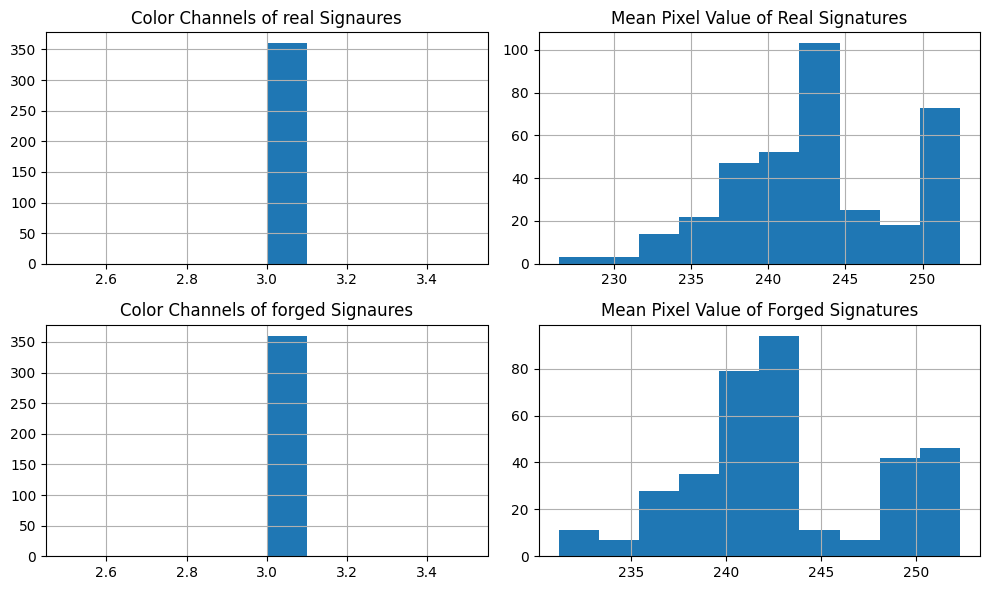

In [12]:
#create histograms to visualize the distribution of image data
fig,ax=plt.subplots(2,2,figsize=(10,6))
image_data[image_data['Type']=='Real']['Color Channels'].hist(ax=ax[0,0])
image_data[image_data['Type']=='Forged']['Color Channels'].hist(ax=ax[1,0])
image_data[image_data['Type']=='Real']['Mean Pixel Value'].hist(ax=ax[0,1])
image_data[image_data['Type']=='Forged']['Mean Pixel Value'].hist(ax=ax[1,1])

ax[0,0].set_title('Color Channels of real Signaures')
ax[0,1].set_title('Mean Pixel Value of Real Signatures')
ax[1,0].set_title('Color Channels of forged Signaures')
ax[1,1].set_title('Mean Pixel Value of Forged Signatures')

plt.tight_layout()
plt.show()




In [13]:
#RNN
import tensorflow
from tensorflow import keras
from keras import layers

In [14]:
#load the data
(train_data,train_labels),(test_data,test_labels)=keras.datasets.mnist.load_data()

In [15]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:

# Reshape and normalize data for LSTM input
train_data = train_data.reshape((train_data.shape[0], 28, 28))  # (num_samples, timesteps, features)
test_data = test_data.reshape((test_data.shape[0], 28, 28))     # (num_samples, timesteps, features)
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# # preprocess the data
# train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2]* 1)) 
# test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2]*1))
# train_data = train_data.astype('float32')/255
# test_data = test_data.astype('float32') / 255

In [17]:
#define the model
model=keras.Sequential([layers.LSTM(64,input_shape=(train_data.shape[1], train_data.shape[2])),layers.Dense(10,activation='softmax')])

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
# Save the model in HDF5 format
model.save('my_model.h5')


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        23,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,458 (95.54 KB)

 Trainable params: 24,458 (95.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#define callbacks
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [22]:
#train the model
history=model.fit(train_data,train_labels,batch_size=128,
                  epochs=10,validation_split=0.2,callbacks=[early_stop])

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.5739 - loss: 1.2774 - val_accuracy: 0.8832 - val_loss: 0.3787
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8967 - loss: 0.3373 - val_accuracy: 0.9214 - val_loss: 0.2506
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9350 - loss: 0.2082 - val_accuracy: 0.9523 - val_loss: 0.1554
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9558 - loss: 0.1454 - val_accuracy: 0.9553 - val_loss: 0.1417
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9639 - loss: 0.1217 - val_accuracy: 0.9704 - val_loss: 0.0987
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9695 - loss: 0.1013 - val_accuracy: 0.9718 - val_loss: 0.0989
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9731 - loss: 0.0876 - val_accuracy: 0.9742 - val_loss: 0.0855
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9772 - loss: 0.0775 - va

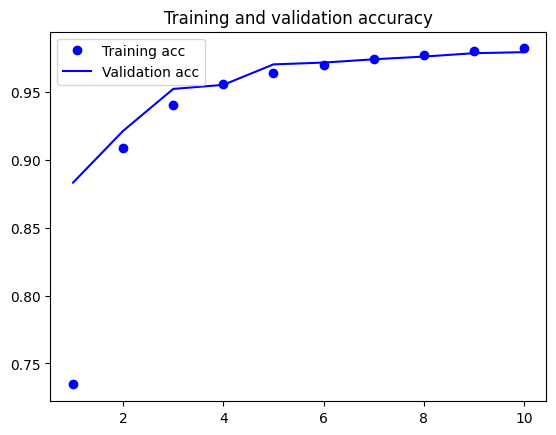

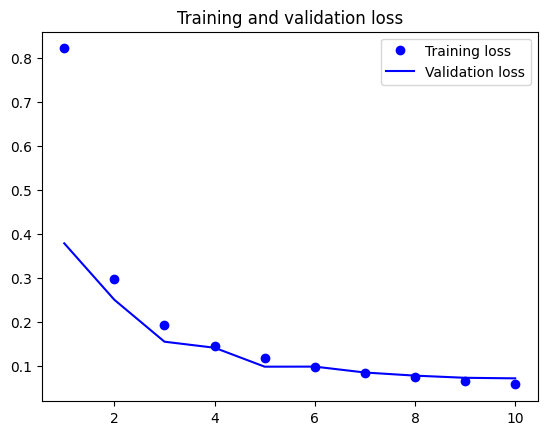

In [25]:
#plot accuracy and loss
acc= history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
#get final loss and accuracy
final_loss,final_accuracy=model.evaluate(test_data,test_labels)

#print results in percentage form
print("final loss: {:.2f}%".format(final_loss*100))
print("final accuracy: {:.2f}%".format(final_accuracy*100))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9732 - loss: 0.0871
final loss: 6.84%
final accuracy: 97.87%


# BI-DIRECTIONAL RNN(B-RNN)


In [27]:
import cv2
import numpy as np
import glob
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Load real and forged signature image paths
gen_sign = [
    glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.png'),
    glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.png'),
    glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.png'),
    glob.glob('Dataset_Signature_Final/Dataset/dataset4/real1/*.png')
]

forg_sign = [
    glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.png'),
    glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.png'),
    glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.png'),
    glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.png')
]

# Flatten lists to remove nested structure
gen_sign = [item for sublist in gen_sign for item in sublist]
forg_sign = [item for sublist in forg_sign for item in sublist]

# Split data into train and test sets (80% train, 20% test)
train_ratio = 0.8
train_gen_sign = gen_sign[:int(len(gen_sign) * train_ratio)]
test_gen_sign = gen_sign[int(len(gen_sign) * train_ratio):]

train_forg_sign = forg_sign[:int(len(forg_sign) * train_ratio)]
test_forg_sign = forg_sign[int(len(forg_sign) * train_ratio):]

train_image_paths = train_gen_sign + train_forg_sign
test_image_paths = test_gen_sign + test_forg_sign

# Preprocess function to resize and split images into patches
def preprocess_image(image_path, img_size=(128, 128), patch_size=(128, 128)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Failed to load image: {image_path}")
    img = cv2.resize(img, img_size)
    return img_to_patches(img, patch_size)

# Function to break image into smaller patches
def img_to_patches(img, patch_size=(128, 128)):
    patches = []
    for i in range(0, img.shape[0], patch_size[0]):
        for j in range(0, img.shape[1], patch_size[1]):
            patch = img[i:i+patch_size[0], j:j+patch_size[1]].flatten()
            patches.append(patch)
    return np.array(patches)

# Process images and assign labels
def process_images(image_paths, label):
    X_data = []
    y_data = []
    for image_path in image_paths:
        try:
            patches = preprocess_image(image_path)
            X_data.append(patches)
            y_data.append(label)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
    return np.array(X_data), np.array(y_data)

# Create training and test datasets
X_train_real, y_train_real = process_images(train_gen_sign, label=0)
X_train_forg, y_train_forg = process_images(train_forg_sign, label=1)

X_test_real, y_test_real = process_images(test_gen_sign, label=0)
X_test_forg, y_test_forg = process_images(test_forg_sign, label=1)

# Combine real and forged data for train and test
X_train = np.concatenate([X_train_real, X_train_forg], axis=0)
y_train = np.concatenate([y_train_real, y_train_forg], axis=0)

X_test = np.concatenate([X_test_real, X_test_forg], axis=0)
y_test = np.concatenate([y_test_real, y_test_forg], axis=0)

# Shuffle training and test data
indices = np.random.permutation(len(X_train))
X_train, y_train = X_train[indices], y_train[indices]

test_indices = np.random.permutation(len(X_test))
X_test, y_test = X_test[test_indices], y_test[test_indices]


In [28]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [29]:
# Print the number of images loaded for real and forged signatures
print(f"Number of real signature images loaded: {len(gen_sign)}")
print(f"Number of forged signature images loaded: {len(forg_sign)}")

# Print the number of images in training and testing sets
print(f"Number of real signature images in training set: {len(train_gen_sign)}")
print(f"Number of forged signature images in training set: {len(train_forg_sign)}")
print(f"Number of real signature images in test set: {len(test_gen_sign)}")
print(f"Number of forged signature images in test set: {len(test_forg_sign)}")

# Print total number of images in the training and test sets
print(f"Total number of training images: {len(train_image_paths)}")
print(f"Total number of test images: {len(test_image_paths)}")


Number of real signature images loaded: 360
Number of forged signature images loaded: 360
Number of real signature images in training set: 288
Number of forged signature images in training set: 288
Number of real signature images in test set: 72
Number of forged signature images in test set: 72
Total number of training images: 576
Total number of test images: 144


In [30]:
print("X_train shape:",X_train.shape)
print("y_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",X_test.shape)

X_train shape: (576, 1, 16384)
y_train shape: (576, 1, 16384)
X_test shape: (144, 1, 16384)
y_test shape: (144, 1, 16384)


In [31]:
timesteps=X_train.shape[1]#number of patches per image
features=X_train.shape[2]#number of features per patch

y_train=to_categorical(y_train,num_classes=2)
y_test=to_categorical(y_test,num_classes=2)

In [32]:
model=Sequential([
    Bidirectional(LSTM(64,return_sequences=False),input_shape=(timesteps,features)),
    Dense(64,activation='relu'),
    Dense(2,activation='softmax')#2 classes:genuine and forged
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 128)            │     8,421,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,430,274 (32.16 MB)

 Trainable params: 8,430,274 (32.16 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.save('bi_rnn_signature_verification_model.h5')

In [35]:
history=model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.5118 - loss: 0.7456 - val_accuracy: 0.5347 - val_loss: 0.6920
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.4910 - loss: 0.6938 - val_accuracy: 0.5347 - val_loss: 0.6914
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.4363 - loss: 0.6953 - val_accuracy: 0.5278 - val_loss: 0.6918
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.4747 - loss: 0.6959 - val_accuracy: 0.5278 - val_loss: 0.6906
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.5107 - loss: 0.6929 - val_accuracy: 0.5347 - val_loss: 0.6913
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.5206 - loss: 0.6934 - val_accuracy: 0.5139 - val_loss: 0.6911
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.5288 - loss: 0.6915 - val_accuracy: 0.5278 - val_loss: 0.6903
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.5153 - loss: 0.6971 - val_accuracy: 0.

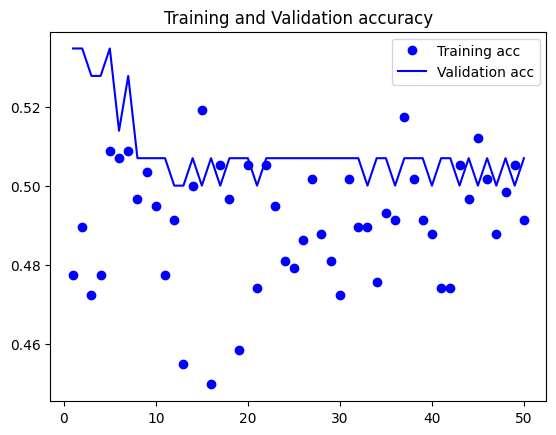

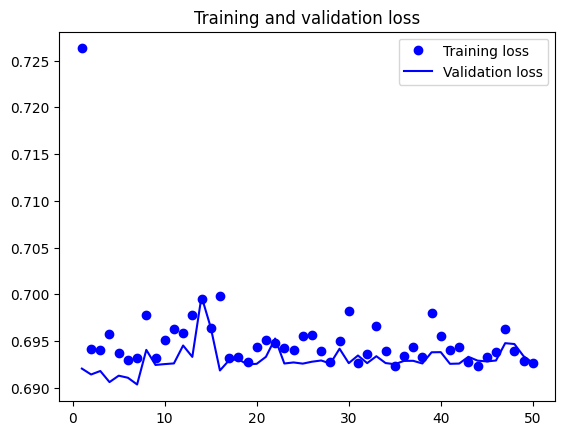

In [36]:
import matplotlib.pyplot as plt
#plot accuracy and loss
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len (acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc') 
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [37]:
#get the final loss and accuracy
final_loss, final_accuracy= model.evaluate(X_test, y_test)
#print the results in percentage form
print('Final loss: {:.2f}%'.format(final_loss * 100)) 
print('Final Accuracy: {:.2f}%'.format(final_accuracy* 100))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5019 - loss: 0.6927
Final loss: 69.27%
Final Accuracy: 50.69%


In [67]:
!pip show django


Name: Django
Version: 5.1.1
Summary: A high-level Python web framework that encourages rapid development and clean, pragmatic design.
Home-page: https://www.djangoproject.com/
Author: 
Author-email: Django Software Foundation <foundation@djangoproject.com>
License: BSD-3-Clause
Location: C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: asgiref, sqlparse, tzdata
Required-by: 


In [69]:
import sys
print(sys.executable)  # This shows the path to the Python interpreter Jupyter is using


c:\Users\harsh\AppData\Local\Programs\Python\Python312\python.exe


In [70]:
!{sys.executable} -m pip show django


Name: Django
Version: 5.1.1
Summary: A high-level Python web framework that encourages rapid development and clean, pragmatic design.
Home-page: https://www.djangoproject.com/
Author: 
Author-email: Django Software Foundation <foundation@djangoproject.com>
License: BSD-3-Clause
Location: c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: asgiref, sqlparse, tzdata
Required-by: 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


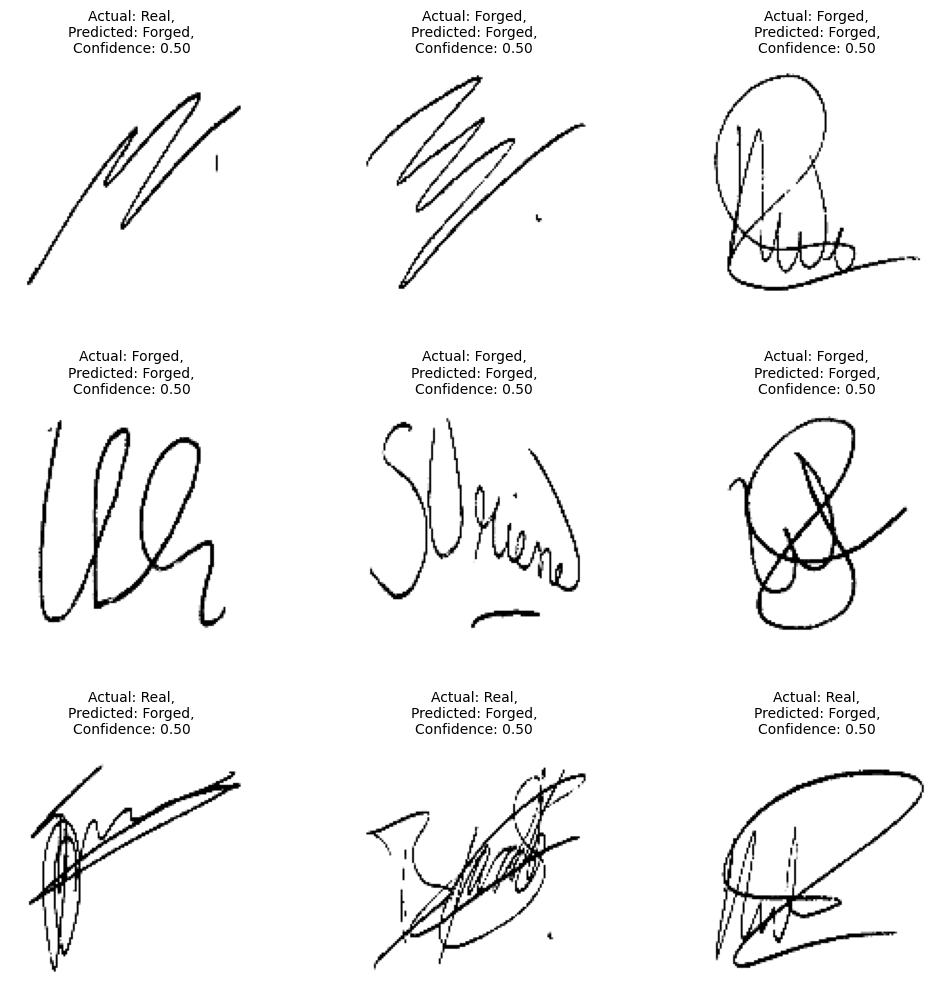

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Create a larger figure to ensure the images are clear
plt.figure(figsize=(12, 12))  # Adjust size to balance clarity and layout

# Loop over the first 9 images
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)  # 3x3 grid
    
    # Reshape the patches back to the correct image shape (128x128)
    image = X_test[i].reshape(128, 128)
    plt.imshow(image, cmap='gray')  # Display the image in grayscale
    
    # Predict the class and confidence
    predicted_class = np.argmax(model.predict(np.expand_dims(X_test[i], axis=0)))  # Predict the class
    confidence = np.max(model.predict(np.expand_dims(X_test[i], axis=0)))  # Get the confidence score
    
    actual_class = np.argmax(y_test[i])  # Get the actual class
    
    class_names = ['Real', 'Forged']  # Class names
    
    # Set the title with actual, predicted class, and confidence
    plt.title(f'Actual: {class_names[actual_class]},\nPredicted: {class_names[predicted_class]},\nConfidence: {confidence:.2f}',
              fontsize=10)  # Slightly smaller font to fit titles better
    
    # Turn off axis ticks and labels for better visualization
    plt.axis('off')

# Optional: Adjust the space between plots to prevent overlap
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plot
plt.show()


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
image_size=256
batch_size=32
channel=3
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset_Signature_Finals",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size
)

Found 720 files belonging to 2 classes.


In [4]:
class_names=dataset.class_names
class_names

['forge', 'real']

In [5]:
len(dataset)

23

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1]


In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[241.      251.      253.     ]
  [241.70703 251.70703 253.     ]
  [242.      252.      253.     ]
  ...
  [242.02344 251.51172 252.48828]
  [241.29297 251.29297 253.     ]
  [242.      252.      253.     ]]

 [[241.      251.      253.     ]
  [241.67941 251.67941 253.     ]
  [241.96094 251.96094 253.     ]
  ...
  [241.9444  251.47266 252.50827]
  [241.2539  251.2539  253.     ]
  [241.96094 251.96094 253.     ]]

 [[241.      251.      253.     ]
  [241.42532 251.42532 253.     ]
  [241.60156 251.60156 253.     ]
  ...
  [241.21722 251.11328 252.69217]
  [240.89453 250.89453 253.     ]
  [241.60156 251.60156 253.     ]]

 ...

 [[241.      251.60156 253.     ]
  [240.85638 251.88327 253.     ]
  [241.1047  252.      253.     ]
  ...
  [243.19455 252.      252.29373]
  [243.39844 252.      252.60156]
  [243.39844 252.      252.60156]]

 [[241.      251.96094 253.     ]
  [240.3482  251.98856 253.     ]
  [240.56985 252.      253.     ]
  ...
  [243.01907 252.      252.

In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[242.      251.      253.     ]
  [242.14453 251.14453 253.     ]
  [242.57422 251.57422 253.     ]
  ...
  [241.      250.      253.     ]
  [241.      250.      253.     ]
  [241.      250.      253.     ]]

 [[242.      251.      253.     ]
  [242.14453 251.14453 253.     ]
  [242.57422 251.57422 253.     ]
  ...
  [241.      250.      253.     ]
  [241.      250.      253.     ]
  [241.      250.      253.     ]]

 [[242.      251.      253.     ]
  [242.14453 251.14453 253.     ]
  [242.57422 251.57422 253.     ]
  ...
  [241.      250.      253.     ]
  [241.      250.      253.     ]
  [241.      250.      253.     ]]

 ...

 [[242.      252.      253.     ]
  [242.14453 252.      253.     ]
  [242.57422 252.      253.     ]
  ...
  [239.14844 248.57422 253.     ]
  [238.28906 248.14453 253.     ]
  [238.      248.      253.     ]]

 [[242.      252.      253.     ]
  [242.14453 252.      253.     ]
  [242.57422 252.      253.     ]
  ...
  [239.14844 248.57422 253.     ]
  [2

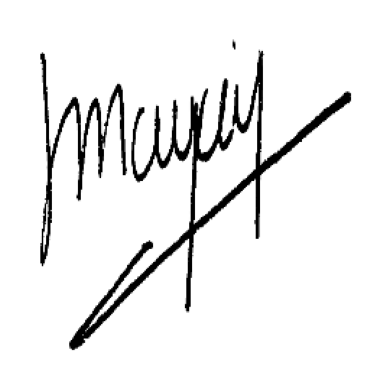

In [9]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.axis('off')

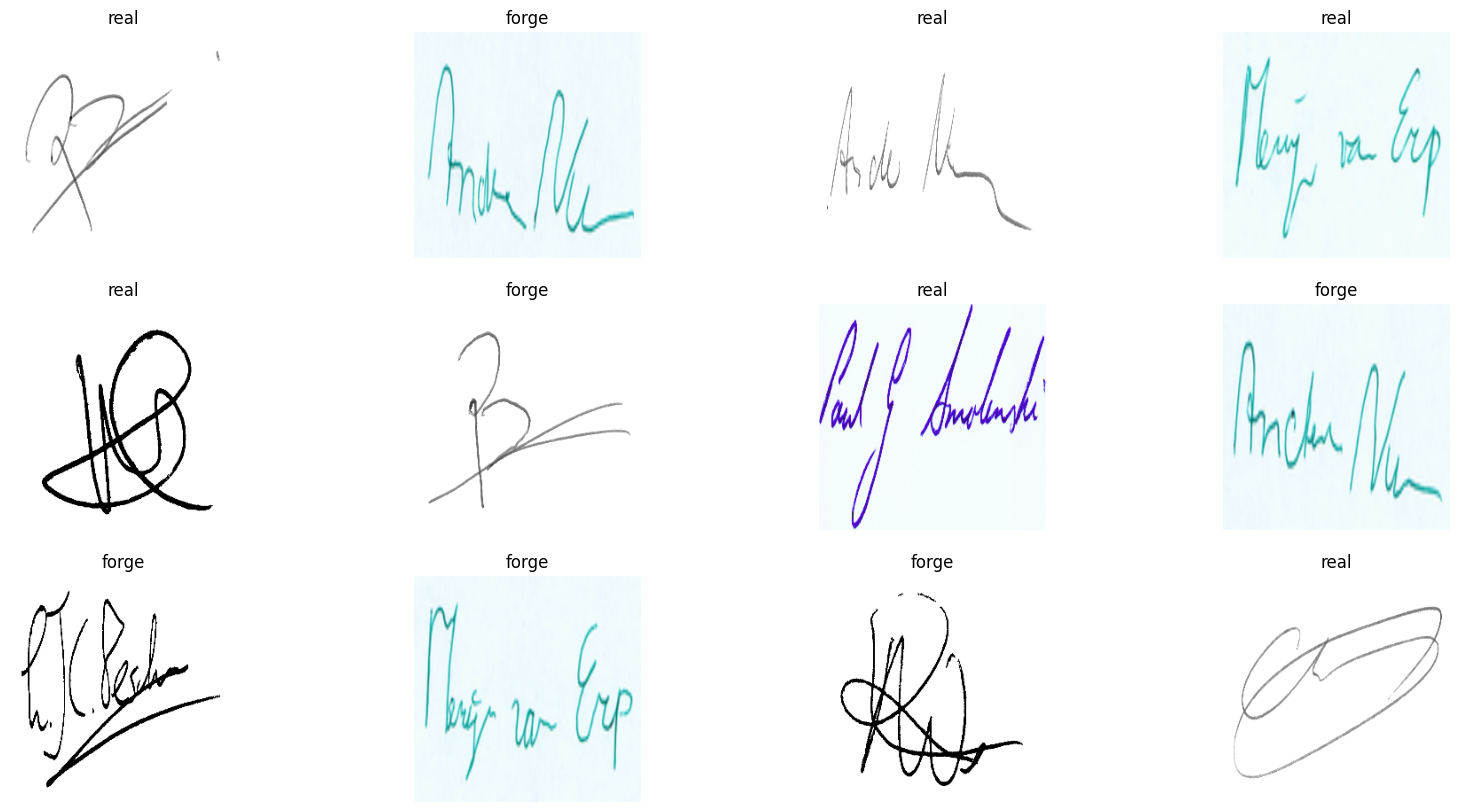

In [10]:
plt.figure(figsize=(20,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [11]:
len(dataset)

23

In [12]:
train_size=0.8
len(dataset)*train_size

18.400000000000002

In [13]:
def getdataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

        train_size=int(train_split*ds_size)
        val_size=int(val_split*ds_size)
        train_ds=ds.take(train_size)
        val_ds=ds.skip(train_size).take(val_size)
        test_ds=ds.skip(train_size).skip(val_size)
        return train_ds,val_ds,test_ds

In [14]:
train_ds,val_ds,test_ds=getdataset_partition(dataset)

In [15]:
len(train_ds)

18

In [16]:
len(val_ds)

2

In [17]:
len(test_ds)

3

In [18]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [19]:
resize_rescale=tf.keras.Sequential([
    layers.Resizing(image_size,image_size),
    layers.Rescaling(1/0.255)
])

In [20]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.1)
])

In [21]:
from tensorflow.keras.models import Sequential

# Assuming image_size, resize_rescale, and data_augmentation are already defined elsewhere
Channel = 3
image_size = 128  # Example image size, adjust as needed
input_shape = (image_size, image_size, Channel)
n_classes = 2

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),  # Corrected input layer
    resize_rescale,  # Resize and rescale layer
    data_augmentation,  # Data augmentation layer

    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu'),  # 32 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),  # Max Pooling with a 2x2 window

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),  # Max Pooling with a 2x2 window

    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),  # Max Pooling with a 2x2 window

    # Fourth Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),  # Max Pooling with a 2x2 window

    # Flatten and Fully Connected Layers
    layers.Flatten(),  # Flatten the feature map to a 1D vector
    layers.Dense(64, activation='relu'),  # Dense layer with 64 units
    layers.Dense(n_classes, activation='softmax')  # Output layer with softmax for classification
])



c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,258 (3.42 MB)

 Trainable params: 896,258 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.save('cnn_signature_verification_model.keras')

In [25]:
history=model.fit(
    train_ds,
    epochs=50,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5335 - loss: 498.0836 - val_accuracy: 0.4688 - val_loss: 1.0200
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5177 - loss: 0.8417 - val_accuracy: 0.4688 - val_loss: 0.7638
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5340 - loss: 0.7059 - val_accuracy: 0.4844 - val_loss: 0.7003
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.4876 - loss: 0.6913 - val_accuracy: 0.5312 - val_loss: 0.6947
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5687 - loss: 0.6884 - val_accuracy: 0.5000 - val_loss: 0.7080
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5205 - loss: 0.6926 - val_accuracy: 0.5781 - val_loss: 0.6812
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5339 - loss: 0.6794 - val_accuracy: 0.5469 - val_loss: 0.6880
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5372 - loss: 0.6753 - val_accuracy: 0.5469 - val_los

In [26]:
scores=model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 479ms/step - accuracy: 0.5193 - loss: 0.6922


In [27]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 18}

In [28]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [29]:
history.history['accuracy']

[0.5035714507102966,
 0.5178571343421936,
 0.5196428298950195,
 0.5089285969734192,
 0.5267857313156128,
 0.5321428775787354,
 0.5178571343421936,
 0.5285714268684387,
 0.5589285492897034,
 0.5553571581840515,
 0.5482142567634583,
 0.5410714149475098,
 0.5357142686843872,
 0.5482142567634583,
 0.550000011920929,
 0.5410714149475098,
 0.5535714030265808,
 0.5392857193946838,
 0.5607143044471741,
 0.5375000238418579,
 0.5339285731315613,
 0.5267857313156128,
 0.5178571343421936,
 0.5446428656578064,
 0.5660714507102966,
 0.5357142686843872,
 0.5446428656578064,
 0.5589285492897034,
 0.550000011920929,
 0.5285714268684387,
 0.5553571581840515,
 0.5428571701049805,
 0.5464285612106323,
 0.5482142567634583,
 0.5589285492897034,
 0.5446428656578064,
 0.5428571701049805,
 0.5464285612106323,
 0.5482142567634583,
 0.5392857193946838,
 0.5678571462631226,
 0.5553571581840515,
 0.5607143044471741,
 0.5267857313156128,
 0.5321428775787354,
 0.5267857313156128,
 0.5303571224212646,
 0.551785707473

In [30]:
acc_his=history.history['accuracy']
val_acc_his=history.history['val_accuracy']

loss_his=history.history['loss']
val_loss_his=history.history['val_loss']



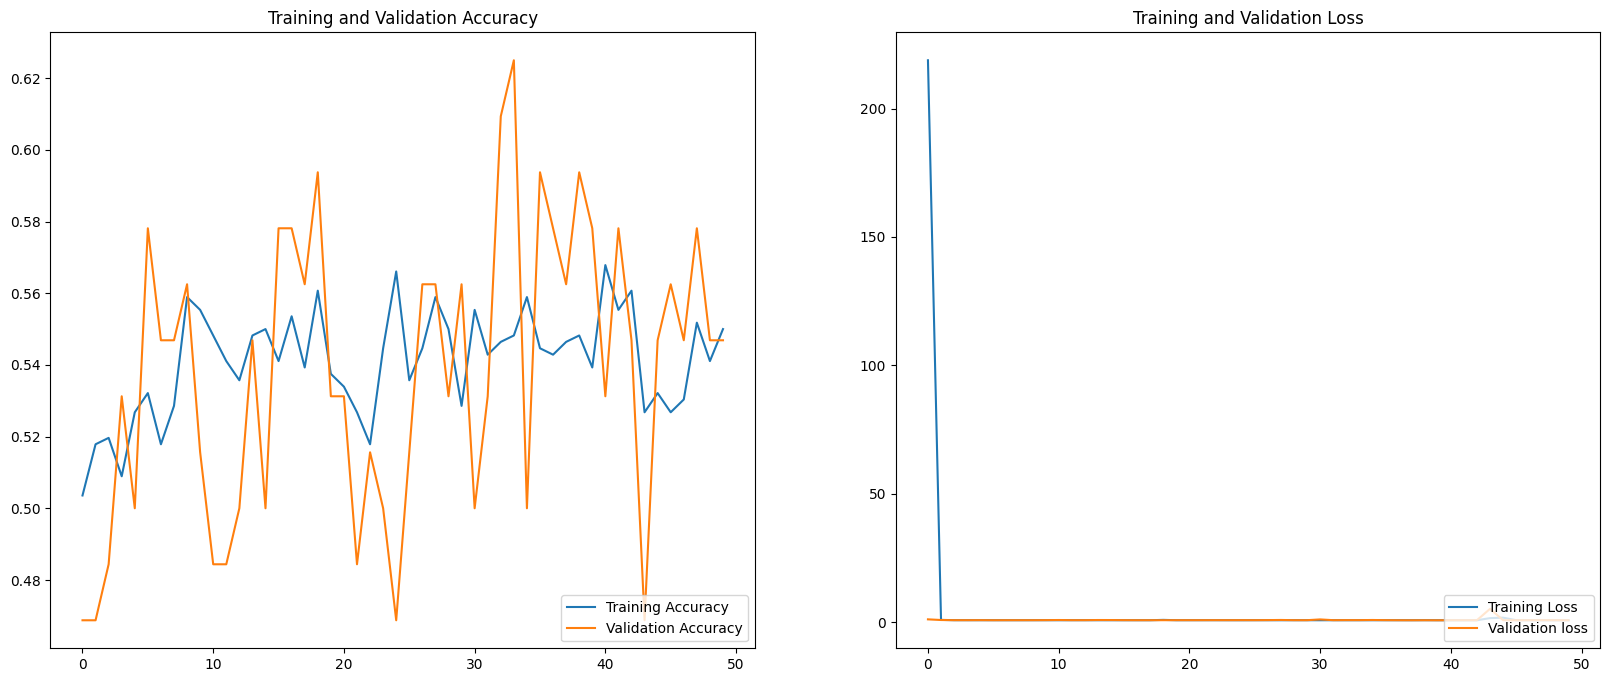

In [31]:
plt.figure(figsize=(20,8))
ax = plt.subplot(1,2,1)
plt.plot(range(50), acc_his, label='Training Accuracy')
plt.plot(range(50), val_acc_his, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

ax = plt.subplot(1,2,2)
plt.plot(range(50), loss_his, label='Training Loss')
plt.plot(range(50), val_loss_his, label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual Label: real
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
predicted label: forge


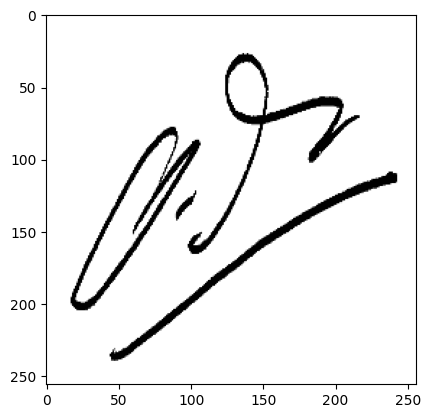

In [32]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8') 
    first_label = label_batch[0].numpy()

    print('First image to predict')
    plt.imshow(first_image)
    print('Actual Label:', class_names[first_label])

    batch_predictions= model.predict(image_batch) 
    print('predicted label:', class_names[np.argmax(batch_predictions[0])])

In [33]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])] 
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


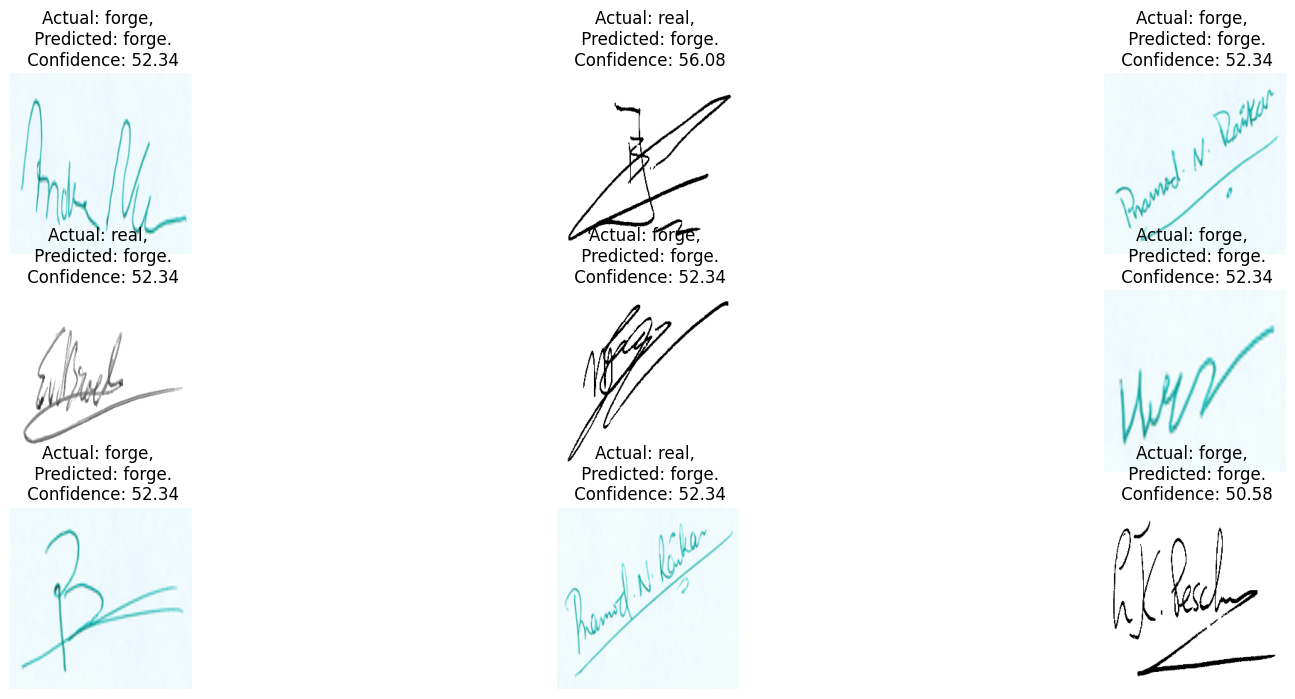

In [34]:
plt.figure(figsize=(20,8))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}')
        plt.axis('off')

In [35]:
#get the final loss and accuracy
final_loss, final_accuracy = model.evaluate(test_ds)

#print the results in percentage form
print('Final loss: {:.2f}%'.format(final_loss * 100))
print('Final Accuracy: {:.2f}%'.format(final_accuracy* 100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 328ms/step - accuracy: 0.5115 - loss: 0.6933
Final loss: 69.39%
Final Accuracy: 51.25%
